# Step 3. Thresholding
- Goal: to detect the pixels of the sperm body.
- Challenge: the rear portion of the flagellum is either too thin to be seen or not captured by the camera.

In [1]:
from __future__ import print_function
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DisplayImageAsArray(image, title):
    array = sitk.GetArrayFromImage(image)
    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()
    return

In [3]:
def DisplayArray(array, title):
    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()
    return

## 3.1 Read the movie.

In [4]:
# Blurred movie from curvature flow filter.
imread = sitk.ImageFileReader()
imread.SetFileName( '../Movie/movieBlurredCurvatureFlow.mha' )
movie1 = imread.Execute();
# Recall: parameters for CurvatureFlowImageFilter:
# - NumberOfIterations = 50
# - TimeStep = 0.2

In [5]:
# Blurred movie from median filter.
imread = sitk.ImageFileReader()
imread.SetFileName( '../Movie/movieBlurredMedian.mha' )
movie2 = imread.Execute();
# Recall: parameters for MedianImageFilter:
# - Radius = 3

In [6]:
# Get the size of the movie.
(n1,n2,n3) = movie1.GetSize()

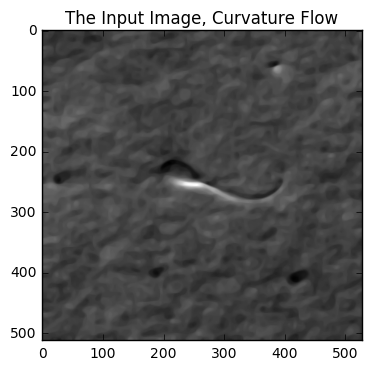

In [7]:
# Disply a frame as an example.
I1 = movie1[:,:,10]
DisplayImageAsArray(I1, "The Input Image, Curvature Flow")

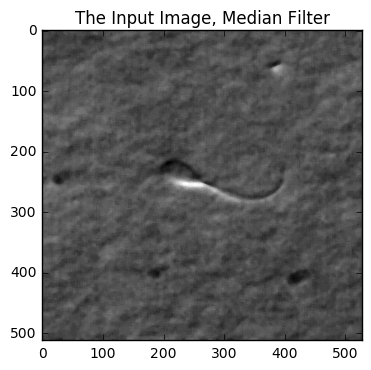

In [8]:
# Disply a frame as an example.
I2 = movie2[:,:,10]
DisplayImageAsArray(I2, "The Input Image, Median Filter")

## 3.2 Define the regions of stains.

In [9]:
# Format: [ xmin, xmax, ymin, ymax]
stains = np.array( [ [1,61,221,271], [361,411,46,76],
                    [166,221,381,421], [391,451,391,431] ] )
ns1,ns2 = stains.shape

## 3.3a Apply the threshold method to one frame.

In [10]:
def Threshold( image, n1, n2, nbhd, threshold, stains, ns1 ):
    # Initialize a matrix. n1,n2 = size(image)
    C = np.zeros((n2,n1))
    # Convert the image to a matrix
    A = np.array( sitk.GetArrayFromImage( image ) )
    
    for i in range(3*nbhd+1,n2-3*nbhd):
        for j in range(3*nbhd+1,n1-3*nbhd):
            # Compute the average intensity of a square centered at (i,j).
            center = np.mean( A[ i-nbhd : i+nbhd+1 , j-nbhd : j+nbhd+1 ] )
            # Compute the average intensity its four neighboring squares.
            neiU = np.mean( A[ i-nbhd : i+nbhd+1 , j-3*nbhd-1 : j-nbhd ] )
            neiD = np.mean( A[ i-nbhd : i+nbhd+1 , j+nbhd+1 : j+3*nbhd+2 ] )
            neiL = np.mean( A[ i-3*nbhd-1 : i-nbhd , j-nbhd : j+nbhd+1 ] )
            neiR = np.mean( A[ i+nbhd+1 : i+3*nbhd+2 , j-nbhd : j+nbhd+1 ] )
            # Compute the differences.
            dU = np.absolute(neiU-center)
            dD = np.absolute(neiD-center)
            dL = np.absolute(neiL-center)
            dR = np.absolute(neiR-center)
        
            # If at least one difference exceeds the threshold value,
            # then mark the index (i,j).
            if dU>threshold or dD>threshold or dL>threshold or dR>threshold:
                C[i,j] = 1
                
    # Remove stains from the thresholding result.
    for i in range(ns1):
        C[ stains[i,2]:stains[i,3], stains[i,0]:stains[i,1] ].fill(0)
        
    return C

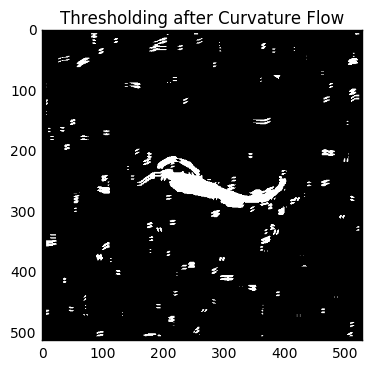

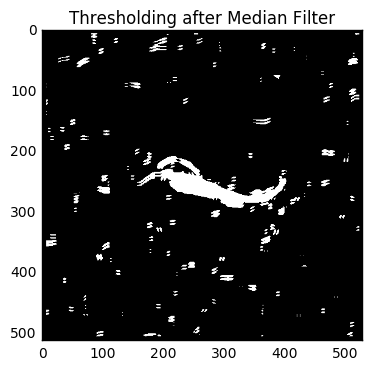

In [11]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 2, 5, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 2, 5, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

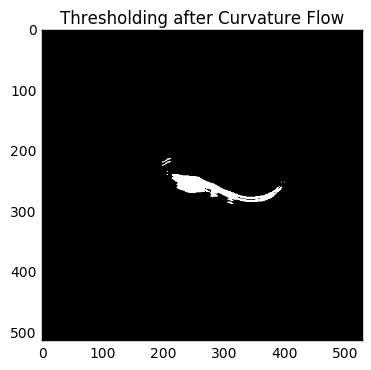

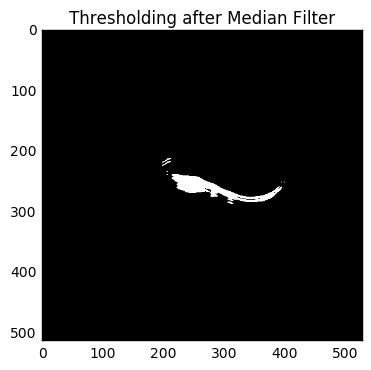

In [12]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 2, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 2, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

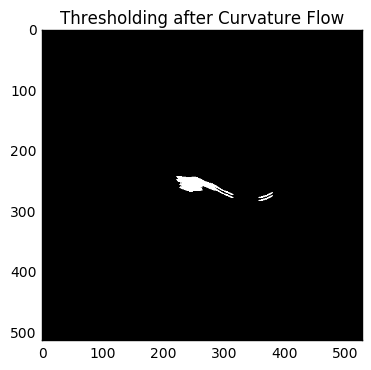

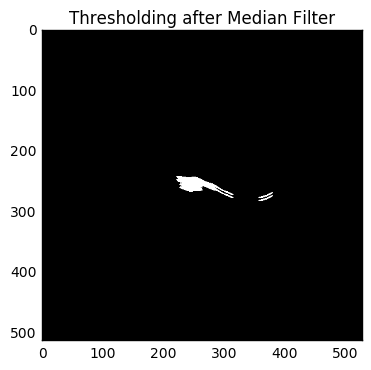

In [13]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 2, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 2, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

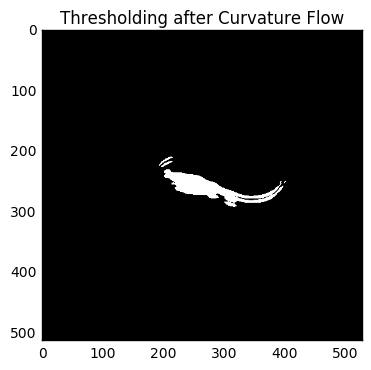

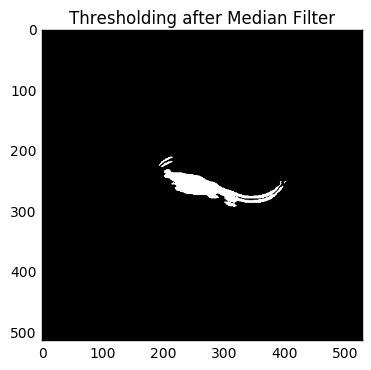

In [14]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 3, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 3, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

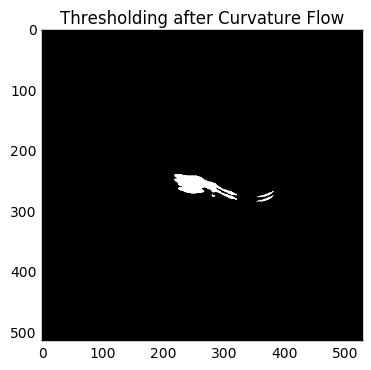

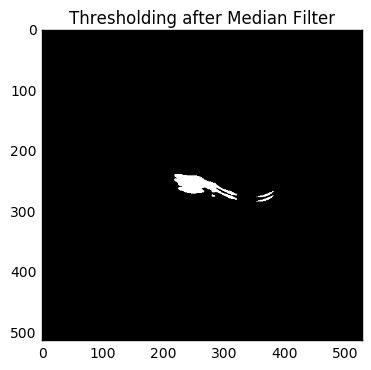

In [15]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 3, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 3, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

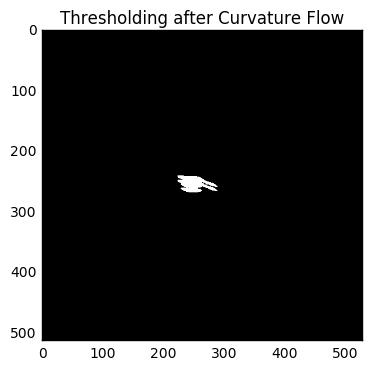

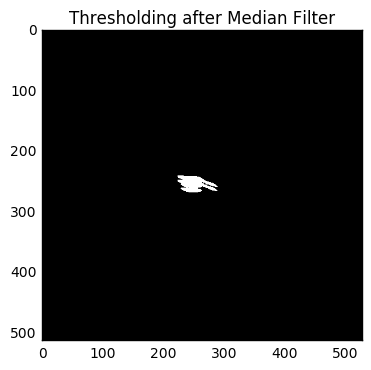

In [16]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 3, 20, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 3, 20, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

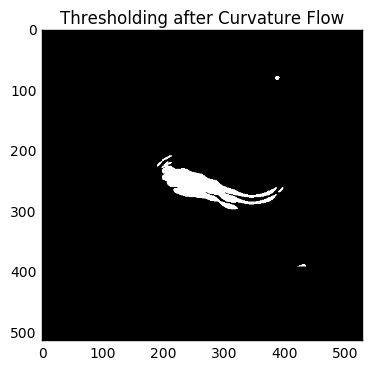

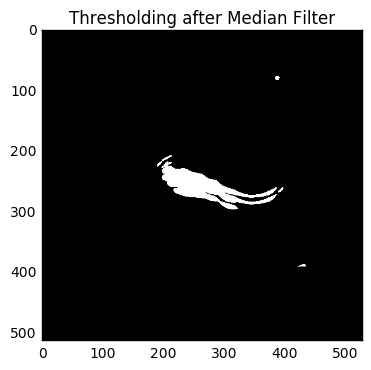

In [17]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 5, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 5, 10, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

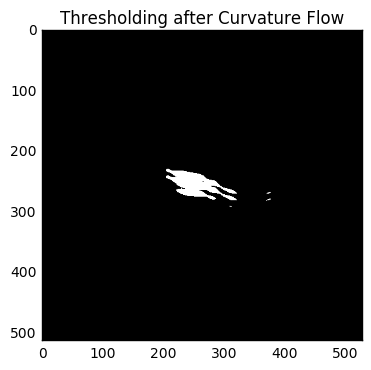

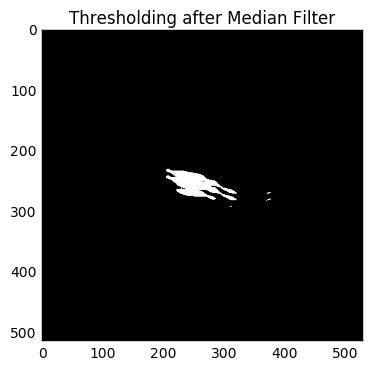

In [18]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 5, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 5, 15, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

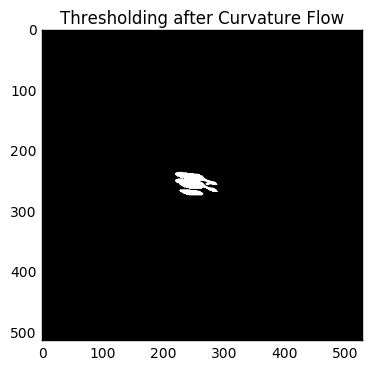

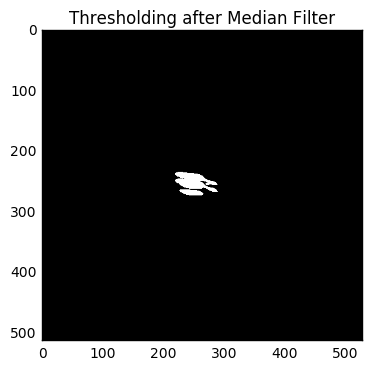

In [19]:
# Apply the filter to one frame.  
C1 = Threshold( I1, n1, n2, 5, 20, stains, ns1 )
DisplayArray(C1, "Thresholding after Curvature Flow")
C2 = Threshold( I2, n1, n2, 5, 20, stains, ns1 )
DisplayArray(C1, "Thresholding after Median Filter")

### Conclusion: 
- When the propused thresholding algorithm is applied, there is no big difference in the result between curvature-flow-filter-blurred image and median-filter-blurred. Hence, we will simply use median filter for blurring.
- To threshold both head and flagellum, set nbhd = 2, threshold = 10.
- To threshold only head, set nbhd = 5, threshold = 20.

## 3.3b Comparison between my algorithm and built-in algorithms.

In [20]:
# Define Otsu's filter
otsuFilter = sitk.OtsuThresholdImageFilter()
otsuFilter.SetInsideValue(0)
otsuFilter.SetOutsideValue( 255 )

<SimpleITK.SimpleITK.OtsuThresholdImageFilter; proxy of <Swig Object of type 'itk::simple::OtsuThresholdImageFilter::Self *' at 0x12343ce40> >

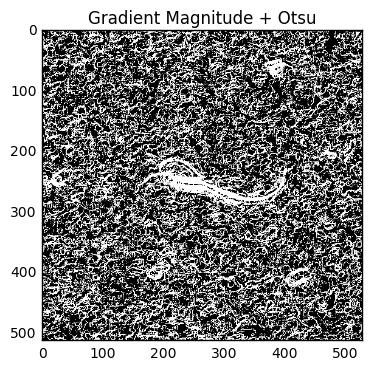

In [21]:
img = sitk.GradientMagnitude(I2)
img = otsuFilter.Execute(img)
DisplayImageAsArray(img,'Gradient Magnitude + Otsu')

## 3.3c Apply the threshold method to the movie frame by frame.

In [22]:
newMovie = np.zeros((n3,n2,n1))
nbhd = 2
threshold = 10
for k in range(n3):
    newMovie[k,:,:] = Threshold( movie2[:,:,k], n1, n2, nbhd, threshold, stains, ns1 )
newMovie = sitk.GetImageFromArray(newMovie)

## 3.4 Write out the result. 

In [23]:
# Save the changes.
imwrite = sitk.ImageFileWriter()
imwrite.SetFileName("movieThresholding.mha")
imwrite.Execute(newMovie)

<SimpleITK.SimpleITK.ImageFileWriter; proxy of <Swig Object of type 'itk::simple::ImageFileWriter *' at 0x11a56b630> >

## 3.5 Conclusion.
Thresholding 
- There are two parameters in this algorithm, block size and threshold value. If the block size is too big, say bigger than the width of the flagellum, or the threshold value is too big, then flagellum pixels will not be picked out. On the other hand, if the block size or the threshold value is too small, background pixels will be picked out. 
- Advantage: The thresholding method proposed in here works better than global thresholding methods. It is in fact a combination of median filter and block thresholding.
- Disadvantage: Since the foreground pixels are determined pixel by pixel, this algorithm is very time-consuming.